In [42]:
### Pacotes necessários
import pandas as pd
import seaborn as sns

## Análise da Filtragem de VCFs

### Dia 1 - Sem filtragem

In [68]:
vcf0 = pd.read_csv("../temp/variants.vcf", sep="\t", skiprows=28)
vcf0.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,temp/alignment.bam
0,chr22,10553503,.,T,G,30.41830,.,DP=2;SGB=-0.379885;FS=0;MQ0F=0;AC=2;AN=2;DP4=0...,GT:PL,"1/1:60,3,0"
1,chr22,10553536,.,G,C,3.22451,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=2;AN=2;DP4=0...,GT:PL,"1/1:30,3,0"
2,chr22,10631436,.,T,G,3.22451,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=2;AN=2;DP4=0...,GT:PL,"1/1:30,3,0"
3,chr22,10631451,.,A,G,3.22451,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=2;AN=2;DP4=0...,GT:PL,"1/1:30,3,0"
4,chr22,10631495,.,T,A,3.22451,.,DP=1;SGB=-0.379885;FS=0;MQ0F=0;AC=2;AN=2;DP4=0...,GT:PL,"1/1:30,3,0"


In [96]:
vcf0.shape

(4691, 11)

In [97]:
vcf1.shape

(2254, 11)

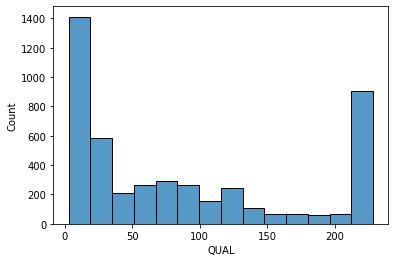

In [69]:
# Histograma da distribuição de qualidade

plots = sns.histplot(vcf0["QUAL"])
plots.figure.savefig("../Figuras/vcf0_qual.png")

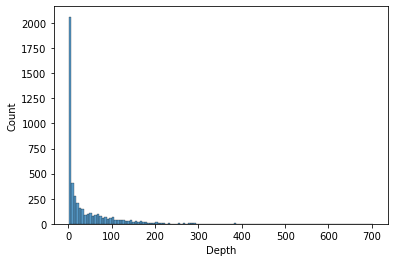

In [79]:
# Histograma da distribuição de cobertura
vcf0["Depth"] = [int(i.split("=")[1].split(";")[0]) for i in vcf0["INFO"]]
plots = sns.histplot(vcf0["Depth"])
plots.figure.savefig("../Figuras/vcf0_dp.png")

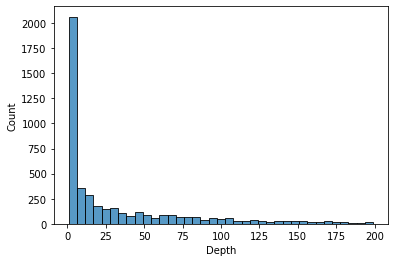

In [81]:
# Histograma da distribuição de cobertura

plots = sns.histplot(vcf0.loc[vcf0["Depth"]<200, "Depth"])
plots.figure.savefig("../Figuras/vcf0_dp<200.png")

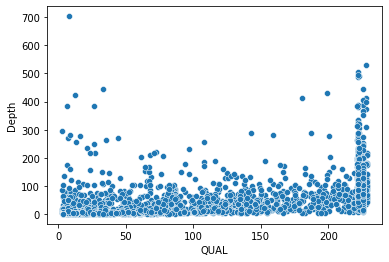

In [95]:
# Dotplot da qualidade por cobertura
plots = sns.scatterplot(x="QUAL", y="Depth", data=vcf0)
plots.figure.savefig("../Figuras/vcf0_qual_dp.png")

### Dia 1 - Após filtragem QUAL>20 & DP>10

In [82]:
vcf1 = pd.read_csv("../Outputs/variants_filt.vcf", sep="\t", skiprows=31)
vcf1.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,temp/alignment.bam
0,chr22,10637059,.,C,T,228.2270,PASS,DP=86;VDB=0.00152636;SGB=-0.693147;RPBZ=3.1643...,GT:PL,"1/1:255,144,0"
1,chr22,10637150,.,T,G,123.4150,PASS,DP=35;VDB=0.598497;SGB=-0.693136;FS=0;MQ0F=0;A...,GT:PL,"1/1:153,105,0"
2,chr22,10685824,.,A,T,81.2678,PASS,DP=13;VDB=0.276556;SGB=-0.636426;RPBZ=1.57576;...,GT:PL,"0/1:114,0,72"
3,chr22,10685838,.,G,A,50.4040,PASS,DP=15;VDB=0.0732611;SGB=-0.616816;RPBZ=2.00706...,GT:PL,"0/1:83,0,80"
4,chr22,10742020,.,T,C,162.4160,PASS,DP=11;VDB=0.767716;SGB=-0.670168;FS=0;MQ0F=0;A...,GT:PL,"1/1:192,30,0"


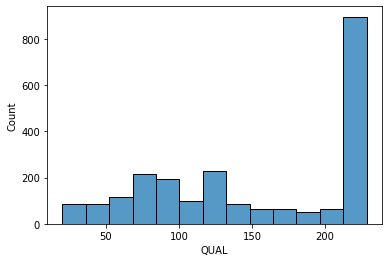

In [83]:
# Histograma da distribuição de qualidade

plots = sns.histplot(vcf1["QUAL"])
plots.figure.savefig("../Figuras/vcf1_qual.png")

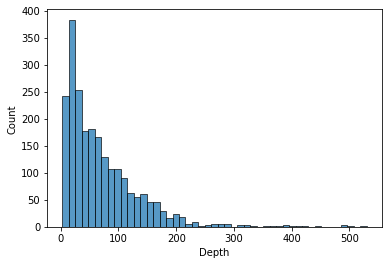

In [84]:
# Histograma da distribuição de cobertura
vcf1["Depth"] = [int(i.split("=")[1].split(";")[0]) for i in vcf1["INFO"]]
plots = sns.histplot(vcf1["Depth"])
plots.figure.savefig("../Figuras/vcf1_dp.png")

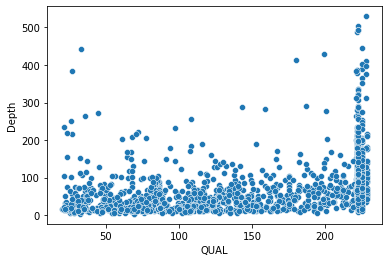

In [94]:
# Dotplot da qualidade por cobertura
plots = sns.scatterplot(x="QUAL", y="Depth", data=vcf1)
plots.figure.savefig("../Figuras/vcf1_qual_dp.png")

### Dia 2 - Após seleção das regiões

In [86]:
vcf2 = pd.read_csv("../Outputs/variants_filt_reg.vcf", sep="\t", skiprows=32)
vcf2.head()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,temp/alignment.bam
0,chr22,15528179,.,G,T,75.8304,PASS,DP=144;VDB=0.720191;SGB=-0.693097;RPBZ=1.05314...,GT:PL,"0/1:110,0,255"
1,chr22,15695704,.,G,A,166.3860,PASS,DP=150;VDB=0.768605;SGB=-0.692067;RPBZ=-0.7298...,GT:PL,"0/1:201,0,255"
2,chr22,15820050,.,A,C,222.2540,PASS,DP=211;VDB=0.391693;SGB=-0.693147;RPBZ=-0.5045...,GT:PL,"0/1:255,0,255"
3,chr22,15820080,.,A,G,222.2910,PASS,DP=283;VDB=0.0734191;SGB=-0.693147;RPBZ=-0.319...,GT:PL,"0/1:255,0,255"
4,chr22,15820150,.,C,A,221.3910,PASS,DP=265;VDB=0.429241;SGB=-0.693147;RPBZ=1.75647...,GT:PL,"0/1:255,0,255"


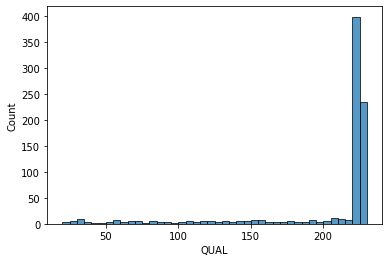

In [102]:
# Histograma da distribuição de qualidade

plots = sns.histplot(vcf2["QUAL"], binwidth=5)
plots.figure.savefig("../Figuras/vcf2_qual.png")

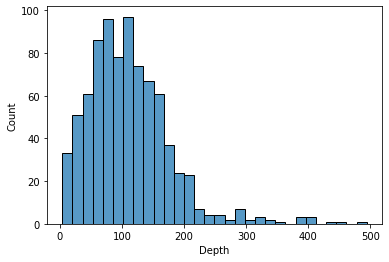

In [90]:
# Histograma da distribuição de cobertura
vcf2["Depth"] = [int(i.split("=")[1].split(";")[0]) for i in vcf2["INFO"]]
plots = sns.histplot(vcf2["Depth"])
plots.figure.savefig("../Figuras/vcf2_dp.png")

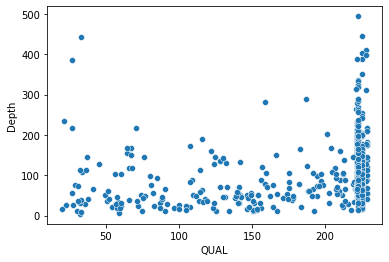

In [93]:
# Dotplot da qualidade por cobertura
plots = sns.scatterplot(x="QUAL", y="Depth", data=vcf2)
plots.figure.savefig("../Figuras/vcf2_qual_dp.png")

## Análise da Cobertura

### Regiões cobertas pelo painel

In [43]:
# Leitura do pequeno-gabarito
good = pd.read_csv('../temp/hist_good.bed', sep="\t", header=None)
good.columns = ["Chr", "Start", "End", "Name", "Coverage", "Covered Length", "Full Length", "Coverage Percentage"]
good.head()

,Chr,Start,End,Name,Coverage,Covered Length,Full Length,Coverage Percentage
0,chr22,15528158,15529139,OR11H1_1,2119,981,981,1.0
1,chr22,15690077,15690709,POTEH_1,1418,632,632,1.0
2,chr22,15695367,15695487,POTEH_2,211,120,120,1.0
3,chr22,15695644,15695818,POTEH_3,234,174,174,1.0
4,chr22,15698654,15698774,POTEH_4,108,120,120,1.0


In [55]:
good.iloc[:, 3:].describe()

,Coverage,Covered Length,Full Length,Coverage Percentage
count,4538.000000,4538.000000,4538.000000,4538.000000
mean,333.808506,203.684442,204.142794,0.998652
std,515.903394,292.479129,294.105149,0.022070
min,0.000000,0.000000,120.000000,0.000000
25%,178.000000,120.000000,120.000000,1.000000
50%,252.000000,128.000000,128.000000,1.000000
75%,351.000000,188.000000,188.750000,1.000000
max,14905.000000,6680.000000,6762.000000,1.000000


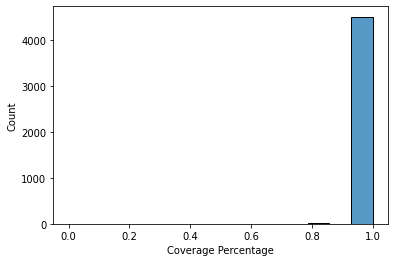

In [45]:
# Histograma da distribuição de porcentagem de cobertura

plots = sns.histplot(good["Coverage Percentage"])
plots.figure.savefig("../Figuras/coverage_in_hist_percentage.png")

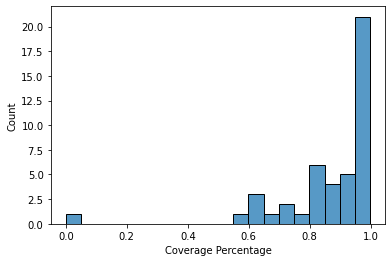

In [46]:
# Histograma da distribuição de porcentagem de cobertura

plots = sns.histplot(good.loc[good["Coverage Percentage"]<1, "Coverage Percentage"], bins=20)
plots.figure.savefig("../Figuras/coverage_in_hist_percentage<1.png")

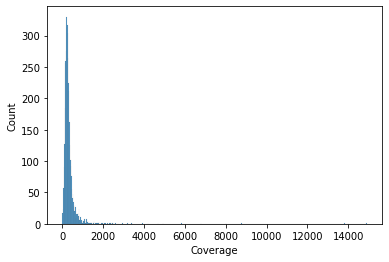

In [47]:
# Histograma da distribuição de porcentagem de cobertura

plots = sns.histplot(good["Coverage"])
plots.figure.savefig("../Figuras/coverage_in_hist_abs.png")

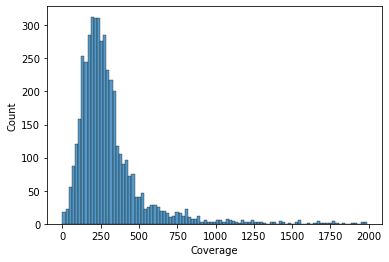

In [48]:
# Histograma da distribuição de porcentagem de cobertura

plots = sns.histplot(good.loc[good["Coverage"]<2000, "Coverage"])
plots.figure.savefig("../Figuras/coverage_in_hist_abs<2000.png")

### Regiões não cobertas pelo painel

In [49]:
# Leitura do pequeno-gabarito
bad = pd.read_csv('../temp/hist_bad.bed', sep="\t", header=None)
bad.columns = ["Chr", "Start", "End", "Coverage", "Covered Length", "Full Length", "Coverage Percentage"]
bad.head()

,Chr,Start,End,Coverage,Covered Length,Full Length,Coverage Percentage
0,chr22,0,15528158,9042,66555,15528158,0.004286
1,chr22,15529139,15690077,1831,14378,160938,0.089339
2,chr22,15690709,15695367,302,512,4658,0.109918
3,chr22,15695487,15695644,207,157,157,1.000000
4,chr22,15695818,15698654,104,380,2836,0.133991


In [56]:
bad.iloc[:, 3:].describe()

,Coverage,Covered Length,Full Length,Coverage Percentage
count,4539.000000,4539.000000,4.539000e+03,4539.000000
mean,214.936770,617.708746,1.099186e+04,0.466735
std,283.701639,1546.438345,2.335940e+05,0.375001
min,6.000000,1.000000,1.000000e+00,0.004286
25%,145.000000,326.000000,4.465000e+02,0.125181
50%,189.000000,451.000000,1.493000e+03,0.330645
75%,236.500000,594.500000,4.156000e+03,0.986485
max,9042.000000,66555.000000,1.552816e+07,1.000000


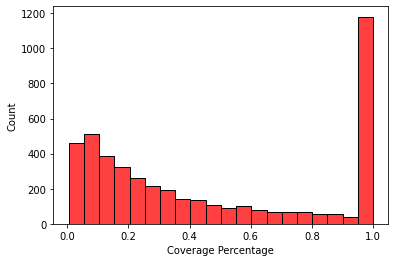

In [57]:
# Histograma da distribuição de porcentagem de cobertura

plots = sns.histplot(bad["Coverage Percentage"], bins=20, color="red")
plots.figure.savefig("../Figuras/coverage_out_hist_percentage.png")

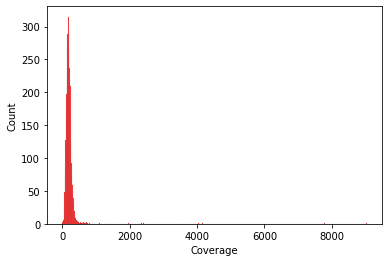

In [58]:
# Histograma da distribuição de porcentagem de cobertura

plots = sns.histplot(bad["Coverage"], color="red")
plots.figure.savefig("../Figuras/coverage_out_hist_abs.png")

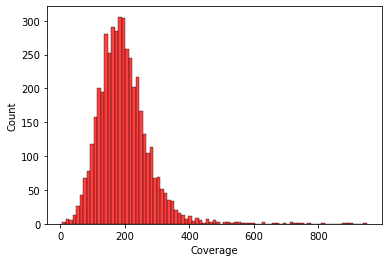

In [60]:
# Histograma da distribuição de porcentagem de cobertura

plots = sns.histplot(bad.loc[bad["Coverage"]<1000, "Coverage"], color="red")
plots.figure.savefig("../Figuras/coverage_out_hist_abs<1000.png")

In [103]:
good["Coverage"].sum()

1514823

In [104]:
bad["Coverage"].sum()

975598